# Loan predictions
## Problem Statement
##### We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset here. These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well.

|Variable| Description|
|--- |---|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|\n",
|Married| Applicant married (Y/N)|\n",
|Dependents| Number of dependents|\n",
|Education| Applicant Education (Graduate/ Under Graduate)|\n",
|Self_Employed| Self employed (Y/N)|\n",
|ApplicantIncome| Applicant income|\n",
|CoapplicantIncome| Coapplicant income|\n",
|LoanAmount| Loan amount in thousands|\n",
|Loan_Amount_Term| Term of loan in months|\n",
|Credit_History| credit history meets guidelines|\n",
|Property_Area| Urban/ Semi Urban/ Rural|\n",
|Loan_Status| Loan approved (Y/N)\n",

# Part 2

## 3. Data Cleaning

- Impute missing values and treat outliers

#### Missing Value imputation strategy for numeric variables:

1. Loan Amount will have it's null values replaced by the mean loan amount given out.
2. Loan Amount Term will have it's null values replaced by the mode (360 months)

In [1117]:
%store -r df
%store -r df_num
%store -r df_cat

In [1118]:
# Replace null values with the mean
df_num['LoanAmount'] = df_num['LoanAmount'].fillna(df_num['LoanAmount'].mean())

In [1119]:
# Replace null values with the mode
df_cat['Loan_Amount_Term'] = df_cat['Loan_Amount_Term'].fillna(df_cat['Loan_Amount_Term'].mode()[0])

In [1120]:
# Check for null values
df_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

##### For categorical variables with over 5% of their data missing (Credit_History and Self_Employed), randomly impute their values based on the frequency of their observations in the original dataset.

##### For categorical variables with less than 5% of their data missing, dropna rows.

In [1121]:
df_cat.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Loan_Amount_Term     0
Credit_History      50
Property_Area        0
dtype: int64

In [1122]:
# Create a dataframe with all the rows with missing values
nan_rows = df_cat[df_cat.isna().any(axis=1)]

# Create a dataframe with only the missing rows corresponding to missing credit history data
nullCredit = nan_rows[nan_rows['Credit_History'].isna() == True]
nullCredit.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
16,Male,No,1,Not Graduate,No,20 year,NaN,Urban
24,Male,Yes,1,Graduate,NaN,30 year,NaN,Semiurban
30,Male,Yes,1,Graduate,NaN,30 year,NaN,Urban
42,Male,Yes,0,Graduate,No,30 year,NaN,Urban
79,Male,Yes,3+,Not Graduate,Yes,30 year,NaN,Semiurban


In [1124]:
# Replace a random sample of NaN values with Yes, with the fraction reflecting
# the frequency of which people who applied had a history of credit scores from the
# findings above.

nullCredit['Credit_History'] = nullCredit['Credit_History'].sample(frac=0.84).replace({np.nan: 'Yes'})

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_11317/3590025876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullCredit['Credit_History'] = nullCredit['Credit_History'].sample(frac=0.84).replace({np.nan: 'Yes'})


In [1125]:
# Replace the rest of the missing null values with No.

nullCredit['Credit_History'] = nullCredit['Credit_History'].replace({np.nan: 'No'})

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_11317/427927544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullCredit['Credit_History'] = nullCredit['Credit_History'].replace({np.nan: 'No'})


In [1126]:
# Verify the missing values were imputed correctly
nullCredit['Credit_History'].isnull().sum()

0

In [1127]:
nullCredit.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
16,Male,No,1,Not Graduate,No,20 year,No,Urban
24,Male,Yes,1,Graduate,NaN,30 year,Yes,Semiurban
30,Male,Yes,1,Graduate,NaN,30 year,No,Urban
42,Male,Yes,0,Graduate,No,30 year,No,Urban
79,Male,Yes,3+,Not Graduate,Yes,30 year,Yes,Semiurban
83,Male,Yes,0,Graduate,No,30 year,Yes,Semiurban
86,Male,Yes,2,Not Graduate,No,30 year,Yes,Semiurban
95,Male,No,0,Graduate,NaN,30 year,Yes,Urban
117,Male,Yes,1,Graduate,No,30 year,Yes,Urban
125,Female,No,0,Graduate,No,30 year,Yes,Rural


In [1128]:
# Create a dataframe with only the missing rows corresponding to missing Self_employment data
nullEmployed = nan_rows[nan_rows['Self_Employed'].isna() == True]
nullEmployed.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
11,Male,Yes,2,Graduate,NaN,30 year,Yes,Urban
19,Male,Yes,0,Graduate,NaN,30 year,Yes,Urban
24,Male,Yes,1,Graduate,NaN,30 year,NaN,Semiurban
29,Female,No,2,Graduate,NaN,30 year,Yes,Semiurban
30,Male,Yes,1,Graduate,NaN,30 year,NaN,Urban


In [1129]:
# Randomly select columns to impute 'Yes' that correspond to the frequency distribution
# of Yesses in the overall dataframe from above.

nullEmployed['Self_Employed'] = nullEmployed['Self_Employed'].sample(frac=0.14).replace({np.nan: 'Yes'})

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_11317/4176826343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullEmployed['Self_Employed'] = nullEmployed['Self_Employed'].sample(frac=0.14).replace({np.nan: 'Yes'})


In [1130]:
# Replace the remaining null values with 'No'.

nullEmployed['Self_Employed'] = nullEmployed['Self_Employed'].replace({np.nan: 'No'})
nullEmployed.head(10)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_11317/3943461361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullEmployed['Self_Employed'] = nullEmployed['Self_Employed'].replace({np.nan: 'No'})


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
11,Male,Yes,2,Graduate,No,30 year,Yes,Urban
19,Male,Yes,0,Graduate,No,30 year,Yes,Urban
24,Male,Yes,1,Graduate,No,30 year,NaN,Semiurban
29,Female,No,2,Graduate,No,30 year,Yes,Semiurban
30,Male,Yes,1,Graduate,No,30 year,NaN,Urban
95,Male,No,0,Graduate,No,30 year,NaN,Urban
107,Male,No,0,Not Graduate,No,30 year,Yes,Rural
111,Female,Yes,0,Graduate,No,30 year,Yes,Semiurban
114,Male,No,0,Graduate,No,30 year,Yes,Semiurban
158,Male,No,0,Graduate,No,30 year,Yes,Rural


In [1131]:
# Impute missing values from the original dataframe with the randomly filled Yesses' and No's
# from these constructed dataframes.

df_cat['Credit_History'] = df_cat['Credit_History'].fillna(nullCredit['Credit_History'])

In [1132]:
# Repeat the process with Self Employment missing values.

df_cat['Self_Employed'] = df_cat['Self_Employed'].fillna(nullEmployed['Self_Employed'])

##### Drop remaining null value rows from category dataframe.

In [1133]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,30 year,Yes,Urban
1,Male,Yes,1,Graduate,No,30 year,Yes,Rural
2,Male,Yes,0,Graduate,Yes,30 year,Yes,Urban
3,Male,Yes,0,Not Graduate,No,30 year,Yes,Urban
4,Male,No,0,Graduate,No,30 year,Yes,Urban
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,30 year,Yes,Rural
610,Male,Yes,3+,Graduate,No,15 year,Yes,Rural
611,Male,Yes,1,Graduate,No,30 year,Yes,Urban
612,Male,Yes,2,Graduate,No,30 year,Yes,Urban


In [1134]:
# We will drop the null value rows from the missing data after concatenating the
# categorical dataframe back with the numerical one.

df_cat.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Detection

#### Extreme values
- Try a log transformation to get rid of the extreme values in LoanAmount. Plot the histogram before and after the transformation

In [1135]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849.0,0.0,146.412162
1,4583.0,1508.0,128.000000
2,3000.0,0.0,66.000000
3,2583.0,2358.0,120.000000
4,6000.0,0.0,141.000000


In [1141]:
df_num['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [1142]:
# Perform log transformation on Loan Amount

df_num_log = np.log(df_num)

/Users/julianlavecchia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


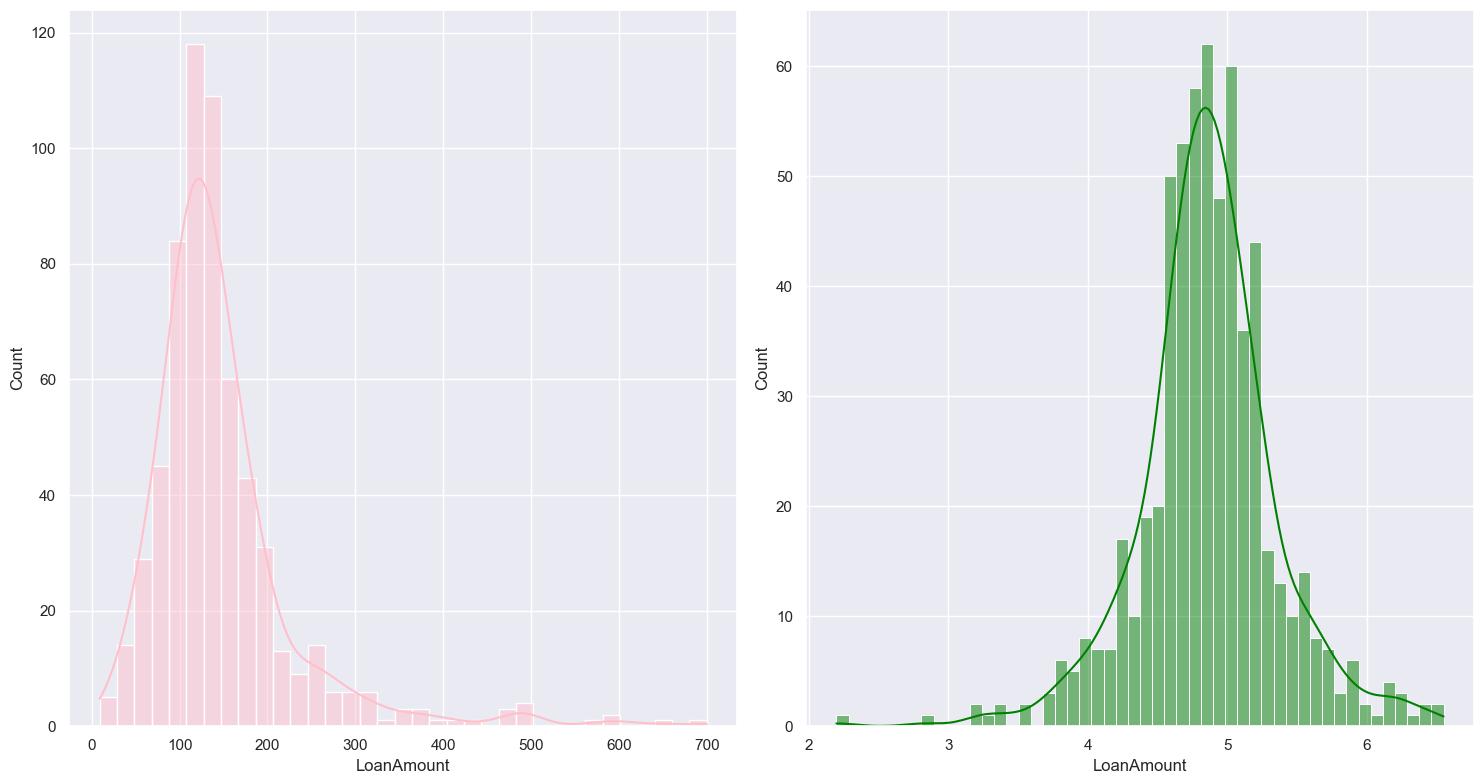

In [1143]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.histplot(data=df_num, x="LoanAmount", kde=True, color="pink", ax = axs[0], bins=35)
sns.histplot(data=df_num_log, x='LoanAmount', kde=True, color="green", ax=axs[1], bins=50)

fig.tight_layout()

- Combine both incomes as total income and take a log transformation of the same.

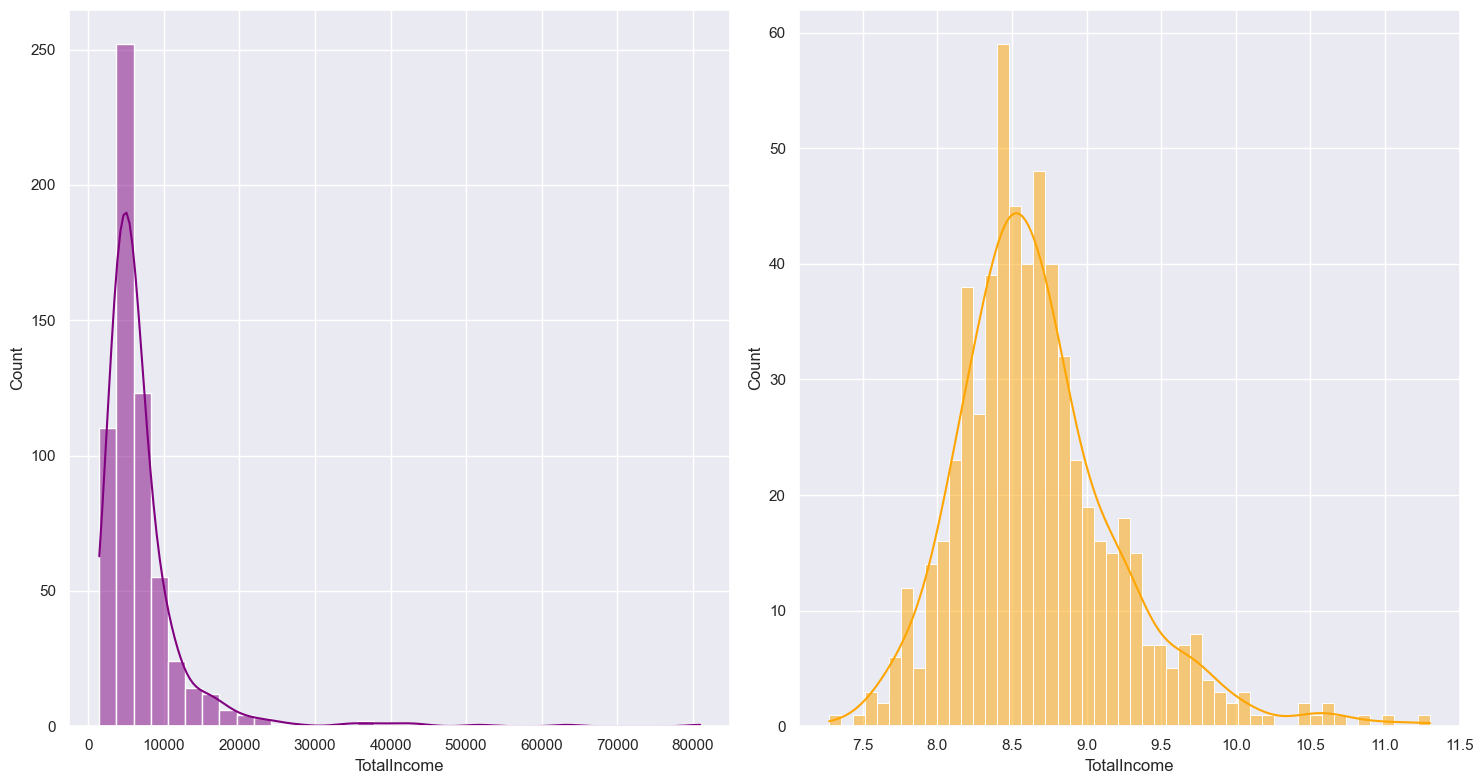

In [1144]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.histplot(data=df_num, x="TotalIncome", kde=True, color="purple", ax = axs[0], bins=35)
sns.histplot(data=df_num_log, x='TotalIncome', kde=True, color="orange", ax=axs[1], bins=50)

fig.tight_layout()

#### We can see how the log transformations created a more normal distribution

<AxesSubplot: xlabel='TotalIncome', ylabel='LoanAmount'>

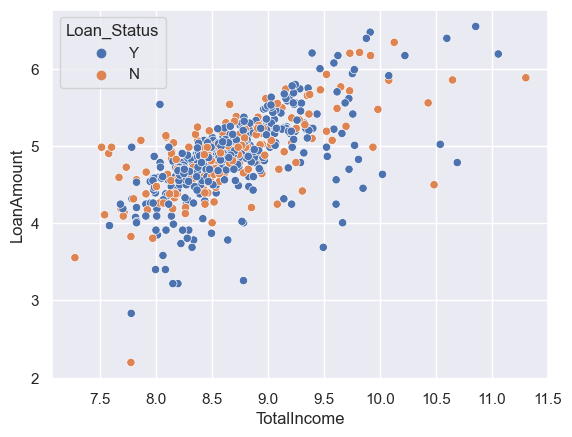

In [1145]:
# Plot a scatter plot of the log transformed columns to see their relationship to
# one another.
sns.scatterplot(x=df_num_log['TotalIncome'], y=df_num_log['LoanAmount'], hue=df['Loan_Status'])

#### We can see that there is a linear relationship between Loan Amount and Total Income

In [1146]:
print(df_num.shape)
print(df_cat.shape)

(614, 4)
(614, 8)


In [1147]:
cleaned_df = pd.concat([df_num, df_cat], axis=1)
cleaned_df['Loan_Status'] = df['Loan_Status']
cleaned_df.shape

(614, 13)

In [1148]:
cleaned_df = cleaned_df.dropna()
cleaned_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
TotalIncome          0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1149]:
%store cleaned_df

Stored 'cleaned_df' (DataFrame)
